In [2]:
import numpy as np

In [157]:
def k_means(K, D):
    def generate_initial_solution():
        result = D[np.random.choice(D.shape[0], K, replace=False), :]
        return result
    
    def assign_to_groups(r, D):
        def dist_between(x_1, x_2):
            return np.sqrt(np.sum(np.power(x_1 - x_2, 2)))
        
        result = np.array([np.argmin(np.array([dist_between(rk, x) for rk in r])) for x in D])
        return result

    def compute_centres(C):
        result = np.array([np.mean(D[C == i, :], axis=0) for i in range(K)])
        return result
        
    r = generate_initial_solution()
    C = assign_to_groups(r, D)
    nr = compute_centres(C)
    
    while (r != nr).any():
        r = nr
        C = assign_to_groups(r, D)
        nr = compute_centres(C)
    
    return C, nr

In [158]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
groups, centres = k_means(3, iris.data)

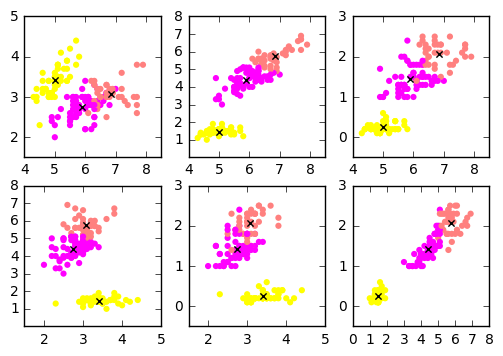

In [181]:
plt.subplot(2, 3, 1)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=groups, cmap="spring", edgecolors="none")
plt.scatter(centres[:, 0], centres[:, 1], c="black", marker="x")
plt.xticks(range(4, 9))
plt.yticks(range(2, 6))

plt.subplot(2, 3, 2)
plt.scatter(iris.data[:, 0], iris.data[:, 2], c=groups, cmap="spring", edgecolors="none")
plt.scatter(centres[:, 0], centres[:, 2], c="black", marker="x")
plt.xticks(range(4, 9))
plt.yticks(range(1, 9))

plt.subplot(2, 3, 3)
plt.scatter(iris.data[:, 0], iris.data[:, 3], c=groups, cmap="spring", edgecolors="none")
plt.scatter(centres[:, 0], centres[:, 3], c="black", marker="x")
plt.xticks(range(4, 9))
plt.yticks(range(0, 4))

plt.subplot(2, 3, 4)
plt.scatter(iris.data[:, 1], iris.data[:, 2], c=groups, cmap="spring", edgecolors="none")
plt.scatter(centres[:, 1], centres[:, 2], c="black", marker="x")
plt.xticks(range(2, 6))
plt.yticks(range(1, 9))

plt.subplot(2, 3, 5)
plt.scatter(iris.data[:, 1], iris.data[:, 3], c=groups, cmap="spring", edgecolors="none")
plt.scatter(centres[:, 1], centres[:, 3], c="black", marker="x")
plt.xticks(range(2, 6))
plt.yticks(range(0, 4))

plt.subplot(2, 3, 6)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=groups, cmap="spring", edgecolors="none")
plt.scatter(centres[:, 2], centres[:, 3], c="black", marker="x")
plt.xticks(range(0, 9))
plt.yticks(range(0, 4))

plt.show()